In [1]:
%matplotlib inline
import camb

In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

In [4]:
#get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars)
powers.keys()

['total',
 'lens_potential',
 'lensed_scalar',
 'unlensed_scalar',
 'unlensed_total',
 'tensor']

In [5]:
powers['total'].shape

(2551, 4)

In [6]:
powers['unlensed_scalar'].shape

(2551, 4)

In [7]:
powers['unlensed_total'].shape

(2551, 4)

In [8]:
powers['lensed_scalar'].shape

(2551, 4)

In [9]:
powers['tensor'].shape

(2551, 4)

In [10]:
powers['lens_potential'].shape

(2551, 3)

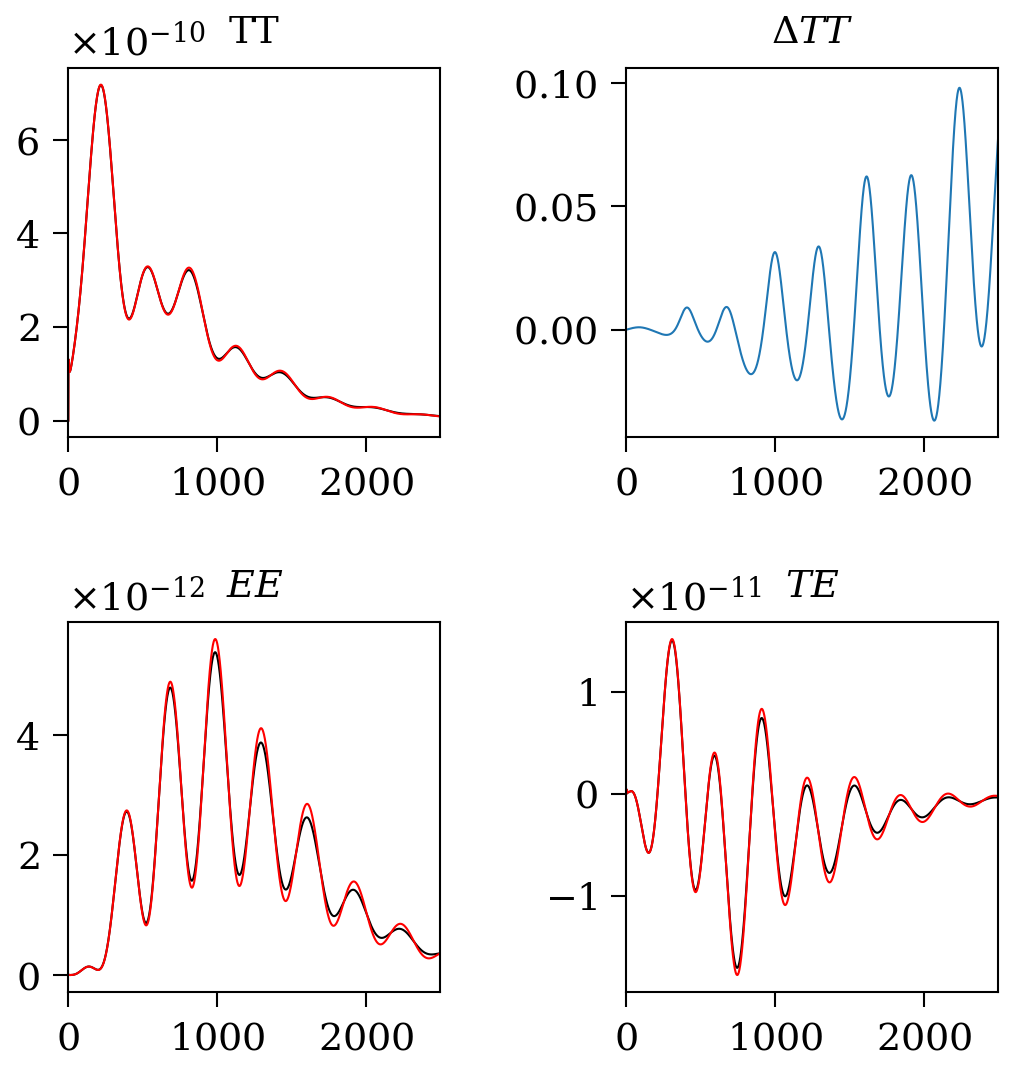

In [11]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL = powers['total']
unlensedCL = powers['unlensed_scalar']
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, axes = plt.subplots(2, 2, figsize = (4, 4), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
tt, dtt, ee, te = axes.flatten()
tt.plot(ls, totCL[:,0], color='k')
tt.plot(ls, unlensedCL[:,0], color='r')
tt.set_title('TT')
dtt.plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
dtt.set_title(r'$\Delta TT$')
ee.plot(ls,totCL[:,1], color='k')
ee.plot(ls,unlensedCL[:,1], color='r')
ee.set_title(r'$EE$')
te.plot(ls,totCL[:,3], color='k')
te.plot(ls,unlensedCL[:,3], color='r')
te.set_title(r'$TE$');
for ax in axes.flatten():
    ax.set_xlim([2,2500])

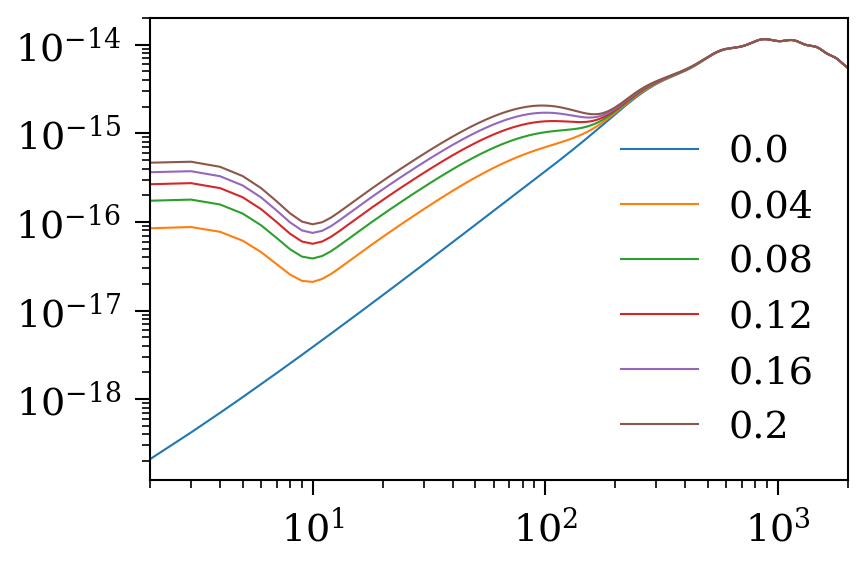

In [12]:
#You can calculate spectra for different primordial power spectra without recalculating everything
#for example, let's plot the BB spectra as a function of r
fig, ax = plt.subplots()
pars.WantTensors = True
results = camb.get_transfer_functions(pars)
lmax = 2000
rs = np.linspace(0,0.2,6)
for r in rs:
    inflation_params = camb.initialpower.InitialPowerParams()
    inflation_params.set_params(ns=0.96, r=r)
    results.power_spectra_from_transfer(inflation_params)
    cl = results.get_total_cls(lmax)
    ax.loglog(np.arange(lmax+1),cl[:,2])
ax.set_xlim([2,lmax])
ax.legend(rs, loc='lower right');

In [13]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.set_dark_energy() #re-set defaults
pars.InitPower.set_params(ns=0.965)
#Not non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = camb.model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = camb.model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


In [14]:
print(results.get_sigma8())

[ 0.53302942  0.80256846]


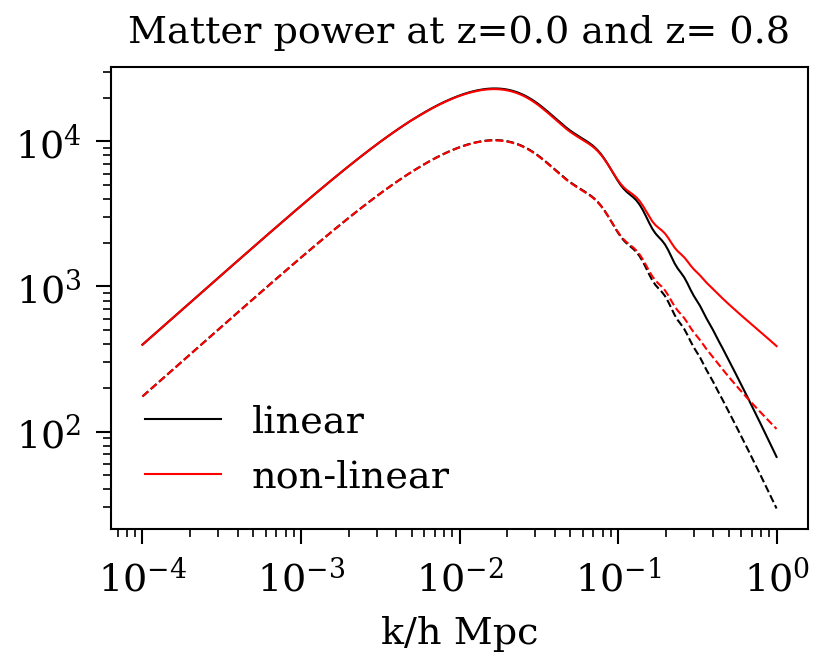

In [15]:
fig, ax = plt.subplots()
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    ax.loglog(kh, pk[i,:], color='k', ls=line)
    ax.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls=line)
ax.set_xlabel('k/h Mpc');
ax.legend(['linear','non-linear'], loc='lower left');
ax.set_title('Matter power at z=%s and z= %s'%tuple(z));

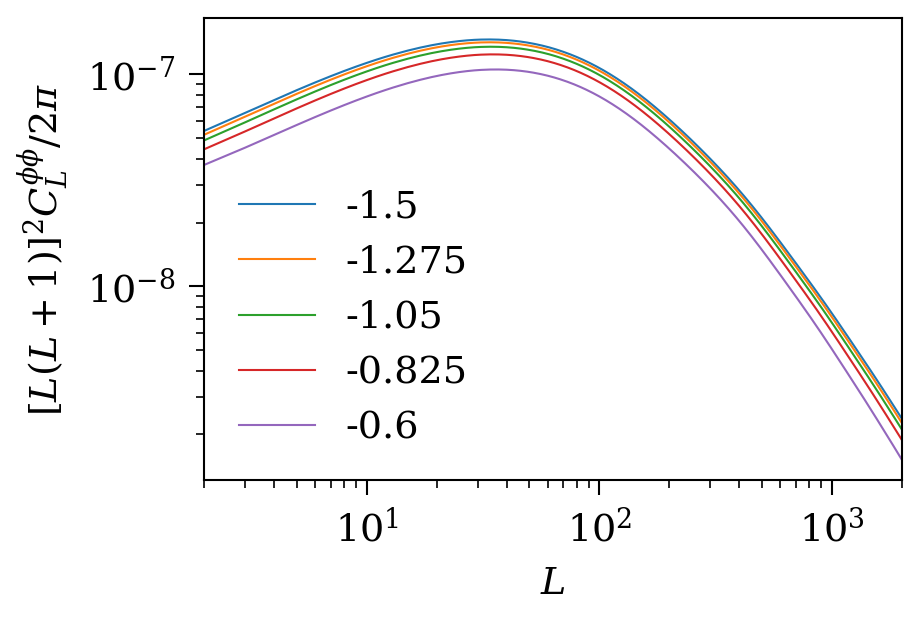

In [16]:
#Plot CMB lensing potential power for various values of w
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)

ws = np.linspace(-1.5, -0.6, 5)
for w in ws:
    pars.set_dark_energy(w) 
    results = camb.get_results(pars)
    cl = results.get_lens_potential_cls(lmax=2000)
    plt.loglog(np.arange(2001), cl[:,0])

#Note dark energy model is currently global, so reset to LCDM by using this:
pars.set_dark_energy() 
plt.legend(ws)
plt.ylabel('$[L(L+1)]^2C_L^{\phi\phi}/2\pi$')
plt.xlabel('$L$')
plt.xlim([2,2000]);

In [17]:
#You can view the parameters (as used by fortran CAMB) using print. 
#Note some of these (from ReionHist and below) are not input parameters but calculated
print(pars)

WantCls = 1
WantTransfer = 0
WantScalars = 1
WantTensors = 0
WantVectors = 0
DoLensing = 1
want_zstar = 0
want_zdrag = 0
PK_WantTransfer = 0
NonLinear = 2
Want_CMB = 1
max_l = 2150
max_l_tensor = 600
max_eta_k = 18000.0
max_eta_k_tensor = 1200.0
omegab = 0.0482853223594
omegac = 0.267764060357
omegav = 0.682534663613
omegan = 0.00141595367142
H0 = 67.5
TCMB = 2.7255
YHe = 0.245223829794
num_nu_massless = 2.03066666667
num_nu_massive = 1
nu_mass_eigenstates = 1
share_delta_neff = 0
nu_mass_degeneracies = [1.0153333333333332, 0.0, 0.0, 0.0, 0.0]
nu_mass_fractions = [1.0, 0.0, 0.0, 0.0, 0.0]
nu_mass_numbers = [1, 0, 0, 0, 0]
scalar_initial_condition = 1
OutputNormalization = 1
AccuratePolarization = 1
AccurateBB = 0
AccurateReionization = 1
MassiveNuMethod = 3
InitPower:
  tensor_parameterization = 2
  nn = 1
  an = [0.965, 1.0, 1.0, 1.0, 1.0]
  n_run = [0.0, 0.0, 0.0, 0.0, 0.0]
  n_runrun = [0.0, 0.0, 0.0, 0.0, 0.0]
  ant = [-0.0, 0.0, 0.0, 0.0, 0.0]
  nt_run = [-0.0, 0.0, 0.0, 0.0, 0.0]

In [18]:
#Get various background functions and derived parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
print('Derived parameter dictionary:\n', results.get_derived_params())

('Derived parameter dictionary:\n', {'rdrag': 146.97861407805524, 'rstar': 144.1990827302237, 'age': 13.740500129586403, 'kd': 0.14069703577905626, 'zdrag': 1059.2079162597656, 'thetaeq': 0.8080688332825076, 'zstar': 1090.569016725706, 'thetarseq': 0.4470013849048753, 'zeq': 3441.168556293452, 'thetad': 0.1617483132531728, 'thetastar': 1.0445694817769524, 'keq': 0.010502751815052997, 'DAstar': 13.804642510225529})


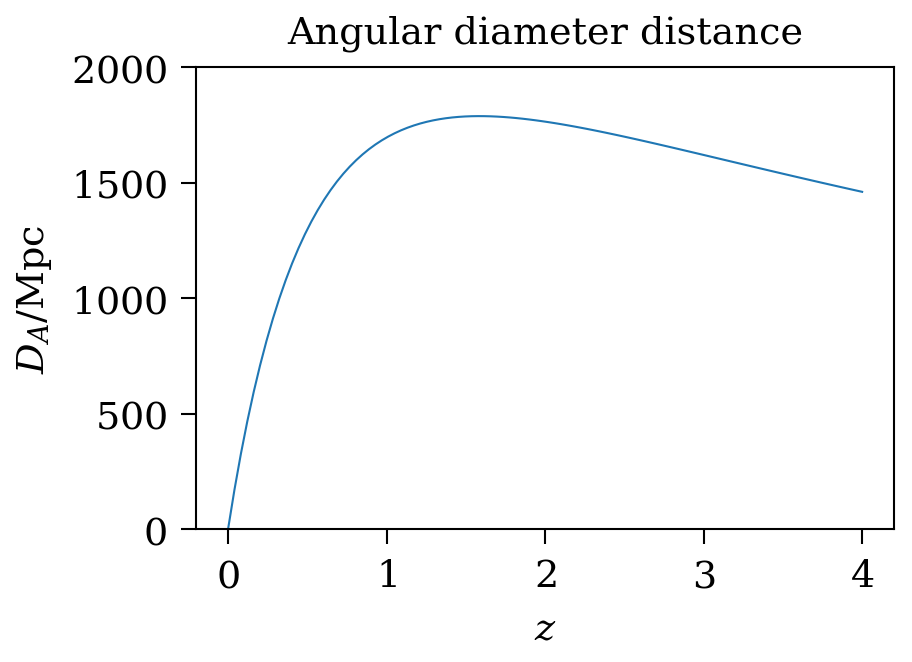

In [19]:
z = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z)
plt.plot(z, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000]);

In [20]:
print('CosmoMC theta_MC parameter: ', results.cosmomc_theta())

('CosmoMC theta_MC parameter: ', 0.01044349755997195)


In [21]:
#You can also directly access some lower level quantities, for example the CMB transfer functions:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
data = camb.get_transfer_functions(pars)
transfer = data.get_cmb_transfer_data()
print('Number of sources (T, E, phi..): %s; number of ell: %s; number of k: %s '%tuple(transfer.delta_p_l_k.shape))

Number of sources (T, E, phi..): 3; number of ell: 85; number of k: 2737 


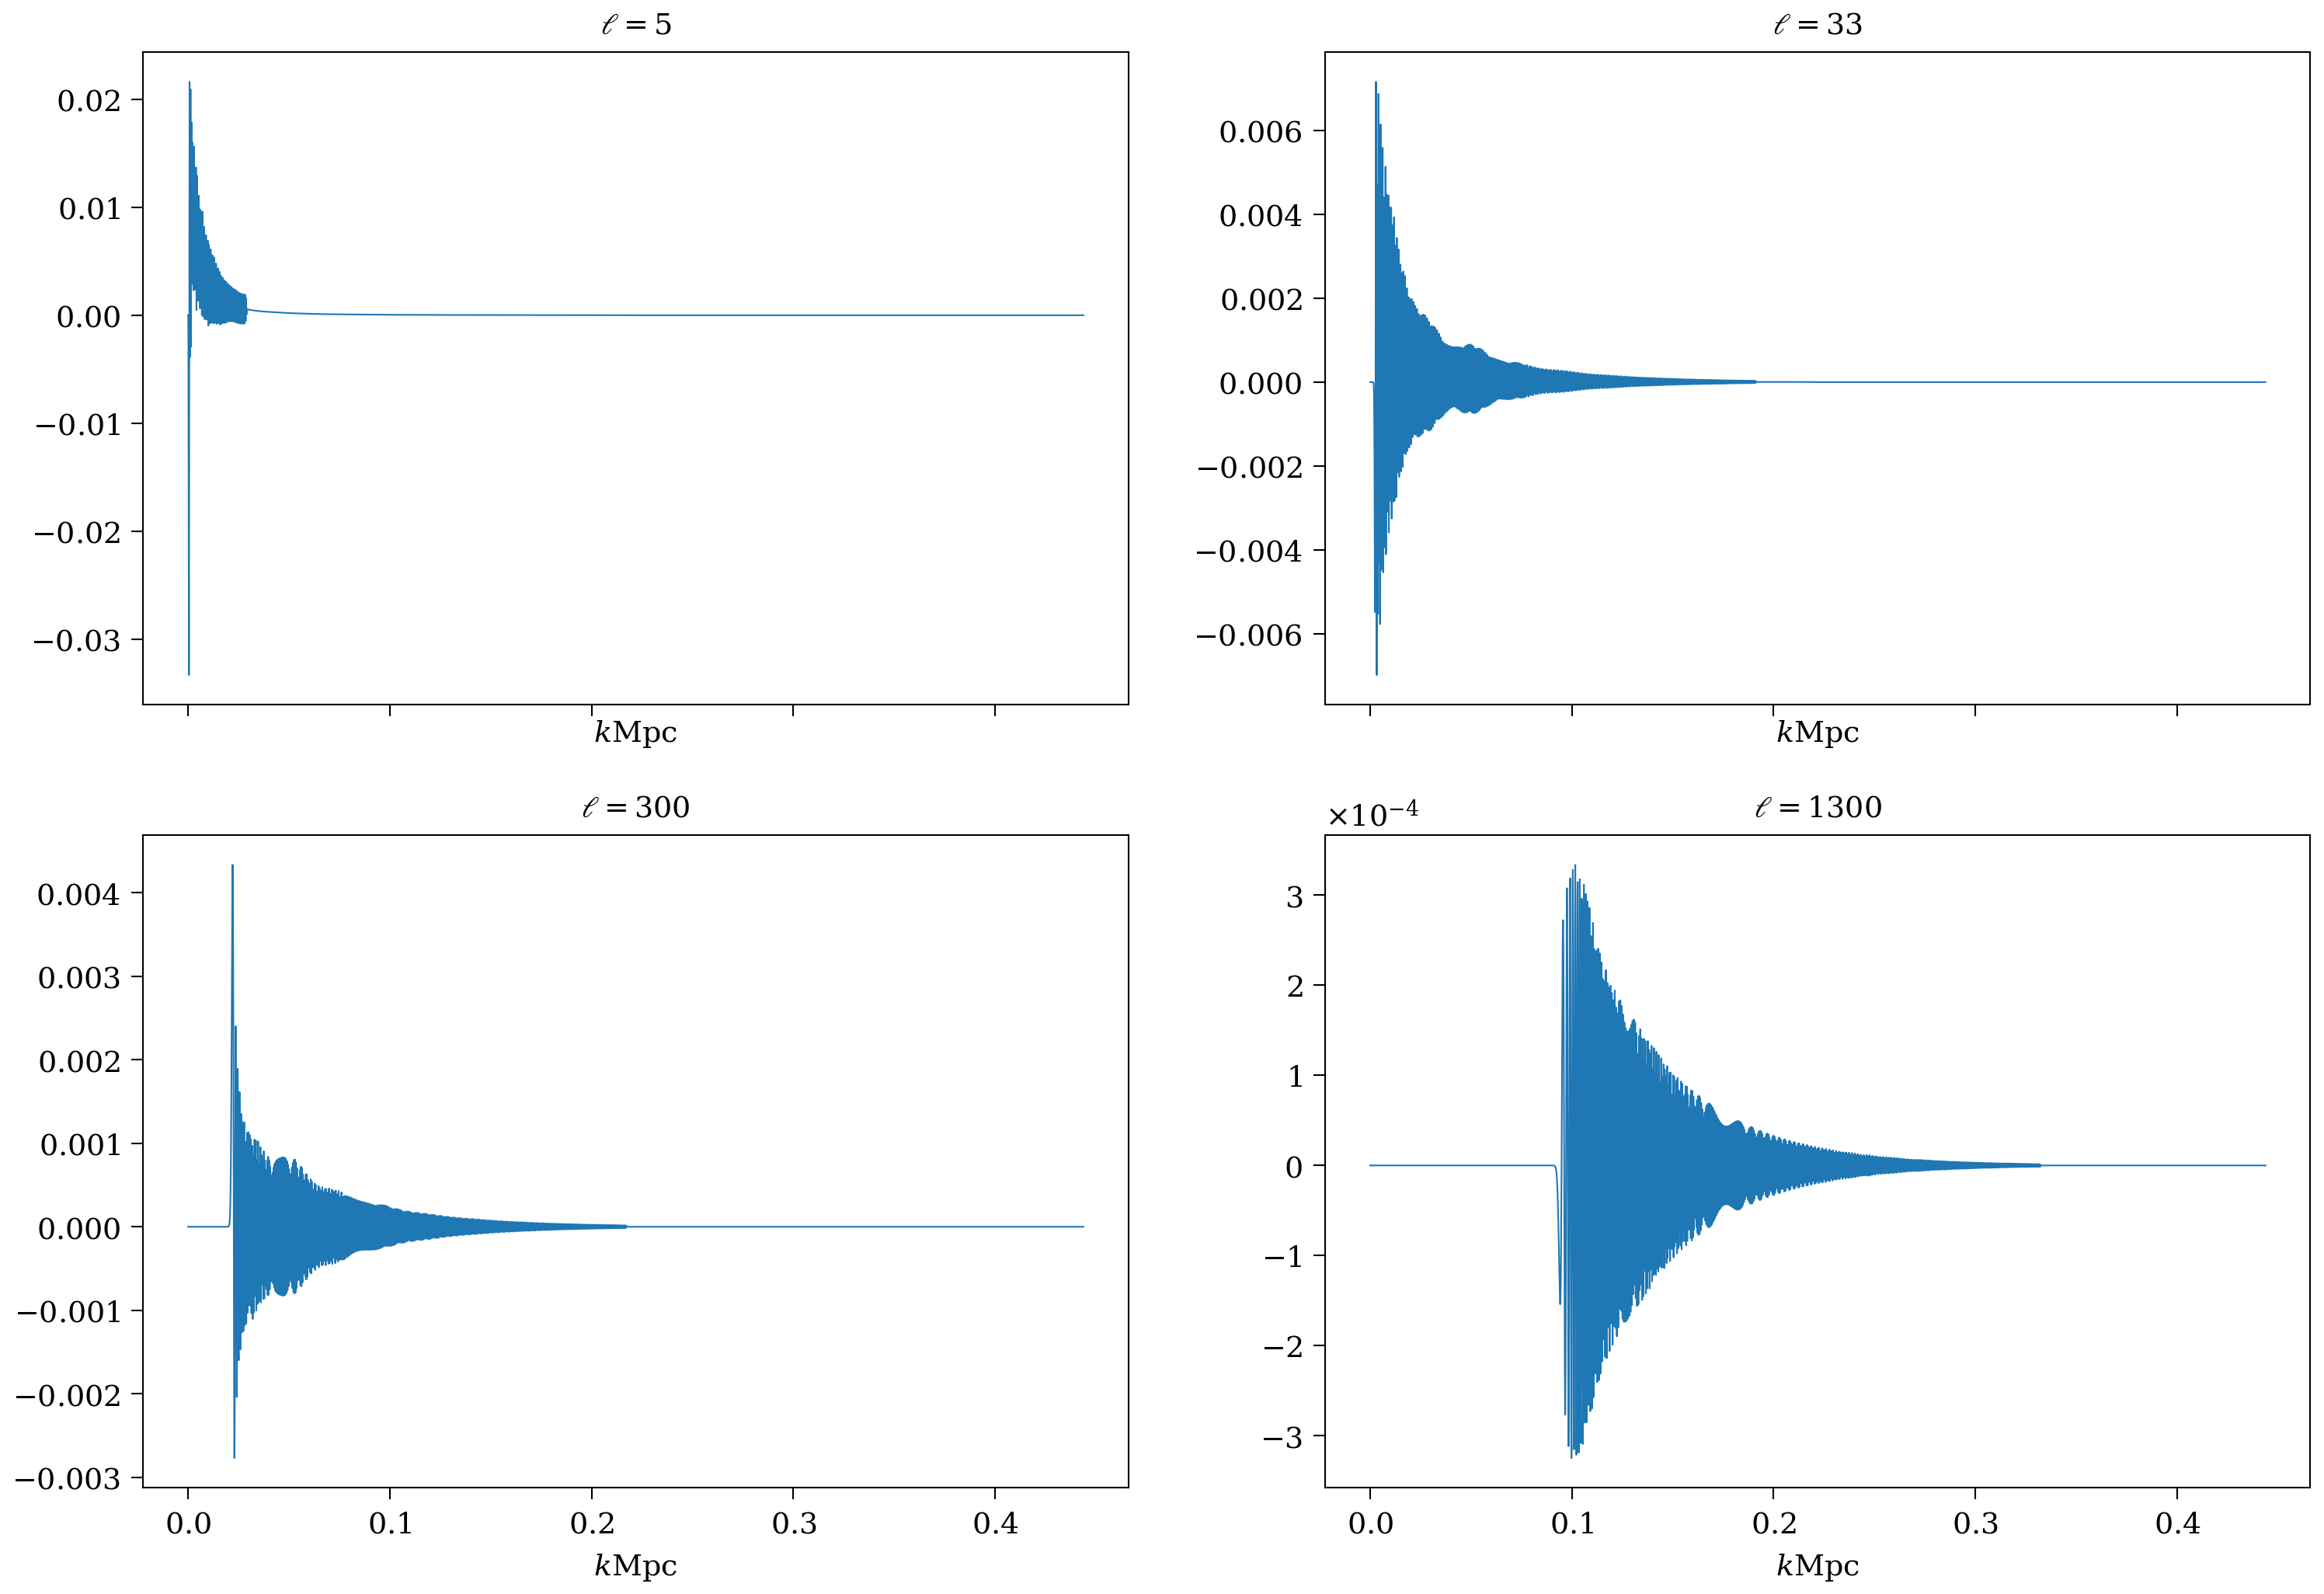

In [22]:
#Plot the transfer functions as a function of k for various ell
fig, axs = plt.subplots(2,2, figsize=(12,8), sharex = True)
for ix, ax in zip([3, 20, 40, 60],axs.reshape(-1)):
    ax.plot(transfer.q,transfer.delta_p_l_k[0,ix,:])
    ax.set_title(r'$\ell = %s$'%transfer.l[ix])
    if ix>1: ax.set_xlabel(r'$k \rm{Mpc}$')